In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR100 Task IL'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'classes_per_task'], y_min=0)

In [3]:
viz.extract_all_runs_metrics()

In [4]:
viz.metrics_df

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,classes_per_task,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;128;True;0.003;40;5;,37.599998,47.351500,8.35,71.000000,24.400000,27.600000,43.712344,12.466667,65.000000,...,128,True,0.003,40,5,29.440000,27.600000,26.884457,14.903334,64.239999
1,stat-wmm;128;True;0.003;40;5;,27.799999,36.716500,8.30,61.000000,26.000000,28.600000,36.836406,12.733334,66.800003,...,128,True,0.003,40,5,31.640000,28.600000,23.310260,10.546667,63.840000
2,stat-wmm;128;True;0.003;40;5;,25.200001,33.977375,8.95,61.000000,20.600000,37.400002,44.373125,7.933333,61.200001,...,128,True,0.003,40,5,34.920000,37.400002,24.791946,11.496667,63.320000
3,stat-wmm;128;True;0.003;40;5;,27.600000,32.770250,6.85,55.000000,17.200001,24.799999,36.541250,11.800001,60.200001,...,128,True,0.003,40,5,30.920000,27.600000,26.118036,14.270001,66.680000
4,stat-wmm;128;True;0.003;40;5;,24.799999,36.220125,8.05,57.000000,23.400000,27.000000,34.282969,12.866666,65.599998,...,128,True,0.003,40,5,32.440000,33.200001,24.700403,13.243333,64.239999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,stat-wmm;128;True;0.003;20;5;,29.400000,35.956500,4.60,47.799999,18.400000,43.799999,54.978437,10.866667,76.400002,...,128,True,0.003,20,5,36.320000,36.000000,25.737119,11.613333,66.160000
114,stat-wmm;128;True;0.003;20;5;,35.000000,39.771250,6.05,59.200001,23.600000,24.799999,34.335000,12.800001,63.200001,...,128,True,0.003,20,5,34.400000,35.000000,27.270333,14.190000,64.920000
115,stat-wmm;128;True;0.003;20;5;,29.000000,30.490750,3.05,41.200001,22.600000,34.200001,41.678125,10.999999,67.199997,...,128,True,0.003,20,5,36.160001,34.400002,26.554512,12.970000,64.759998
116,stat-wmm;128;True;0.003;20;5;,31.200001,40.793000,6.55,57.400002,20.400000,35.599998,39.943438,5.333333,51.599998,...,128,True,0.003,20,5,33.639999,34.000000,22.763456,8.556667,55.520000


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[0]} {uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,classes_per_task,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;128;True;0.003;40;5;,37.599998,47.351500,8.35,71.000000,24.400000,27.600000,43.712344,12.466667,65.000000,...,128,True,0.003,40,5,29.440000,27.600000,26.884457,14.903334,64.239999
1,stat-wmm;128;True;0.003;40;5;,27.799999,36.716500,8.30,61.000000,26.000000,28.600000,36.836406,12.733334,66.800003,...,128,True,0.003,40,5,31.640000,28.600000,23.310260,10.546667,63.840000
2,stat-wmm;128;True;0.003;40;5;,25.200001,33.977375,8.95,61.000000,20.600000,37.400002,44.373125,7.933333,61.200001,...,128,True,0.003,40,5,34.920000,37.400002,24.791946,11.496667,63.320000
3,stat-wmm;128;True;0.003;40;5;,27.600000,32.770250,6.85,55.000000,17.200001,24.799999,36.541250,11.800001,60.200001,...,128,True,0.003,40,5,30.920000,27.600000,26.118036,14.270001,66.680000
4,stat-wmm;128;True;0.003;40;5;,24.799999,36.220125,8.05,57.000000,23.400000,27.000000,34.282969,12.866666,65.599998,...,128,True,0.003,40,5,32.440000,33.200001,24.700403,13.243333,64.239999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,stat-wmm;128;True;0.003;20;5;,29.400000,35.956500,4.60,47.799999,18.400000,43.799999,54.978437,10.866667,76.400002,...,128,True,0.003,20,5,36.320000,36.000000,25.737119,11.613333,66.160000
114,stat-wmm;128;True;0.003;20;5;,35.000000,39.771250,6.05,59.200001,23.600000,24.799999,34.335000,12.800001,63.200001,...,128,True,0.003,20,5,34.400000,35.000000,27.270333,14.190000,64.920000
115,stat-wmm;128;True;0.003;20;5;,29.000000,30.490750,3.05,41.200001,22.600000,34.200001,41.678125,10.999999,67.199997,...,128,True,0.003,20,5,36.160001,34.400002,26.554512,12.970000,64.759998
116,stat-wmm;128;True;0.003;20;5;,31.200001,40.793000,6.55,57.400002,20.400000,35.599998,39.943438,5.333333,51.599998,...,128,True,0.003,20,5,33.639999,34.000000,22.763456,8.556667,55.520000


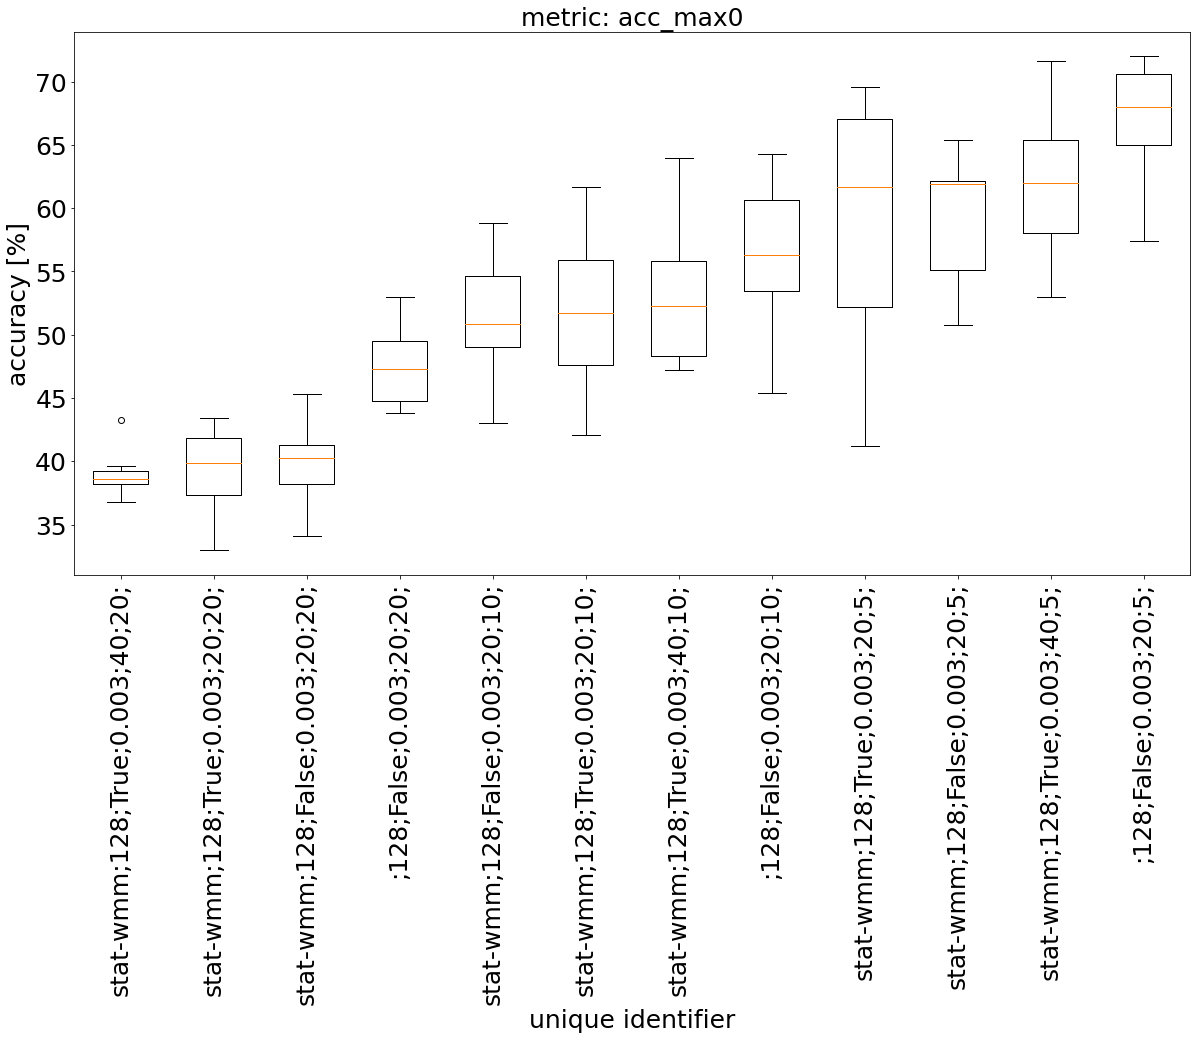

In [6]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='20')]

metric = 'acc_max0'
box_plot(metric, df, f"box_dataset_resnet18_no_separate_{metric}", 25)

df

# All runs

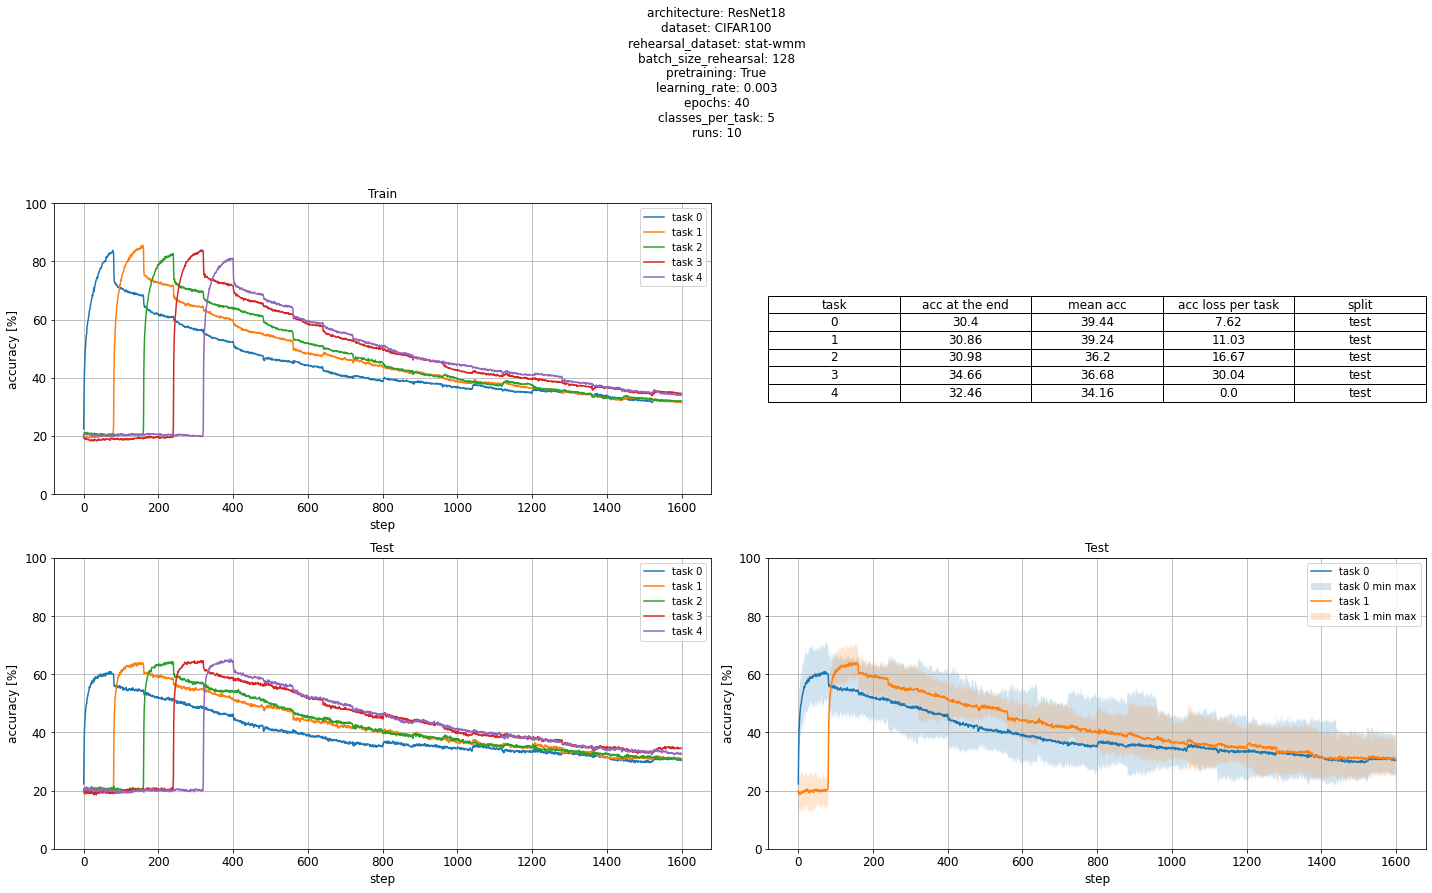

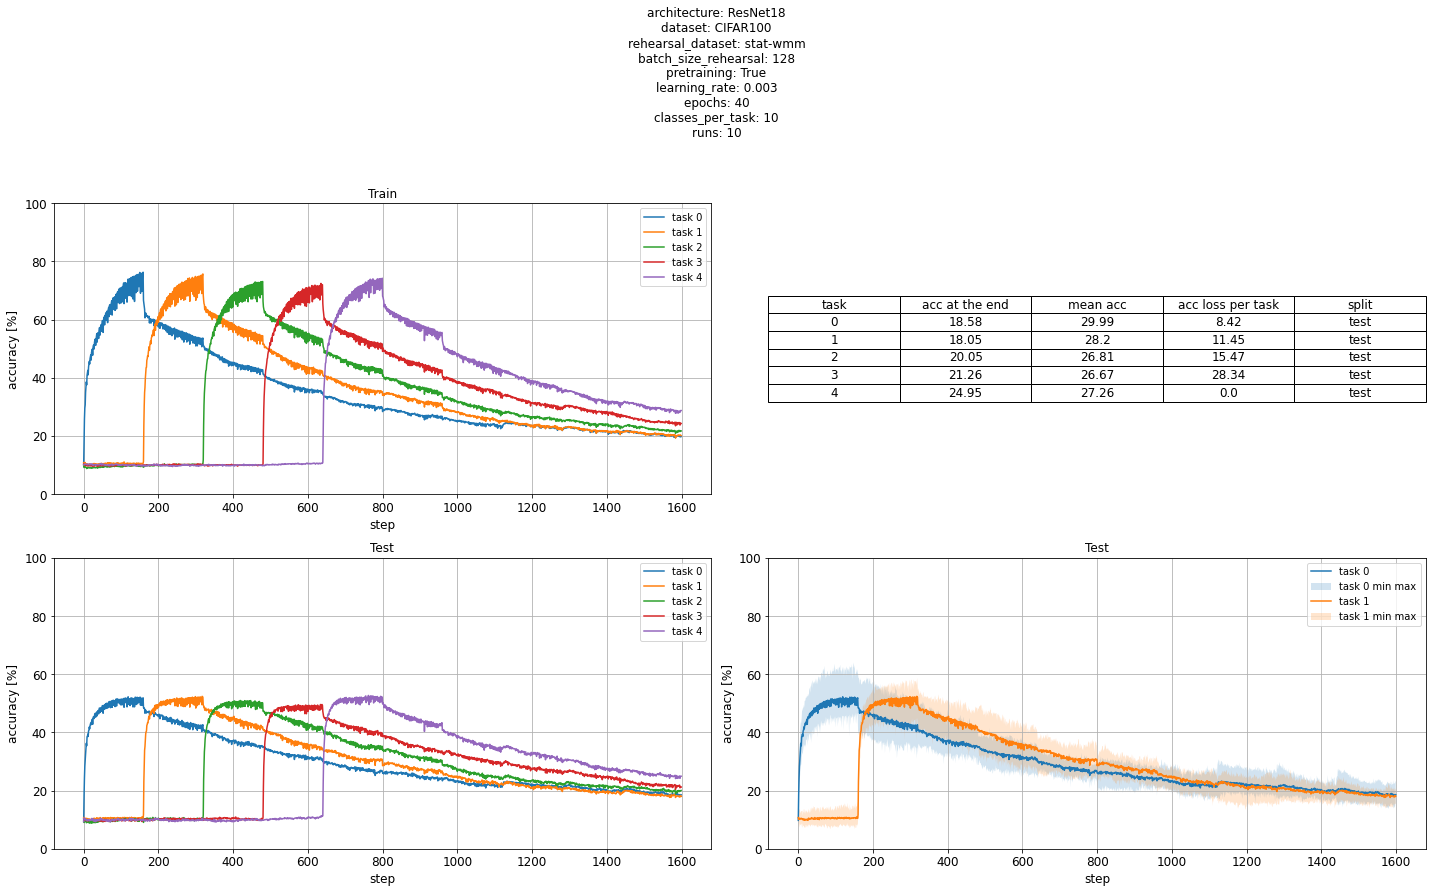

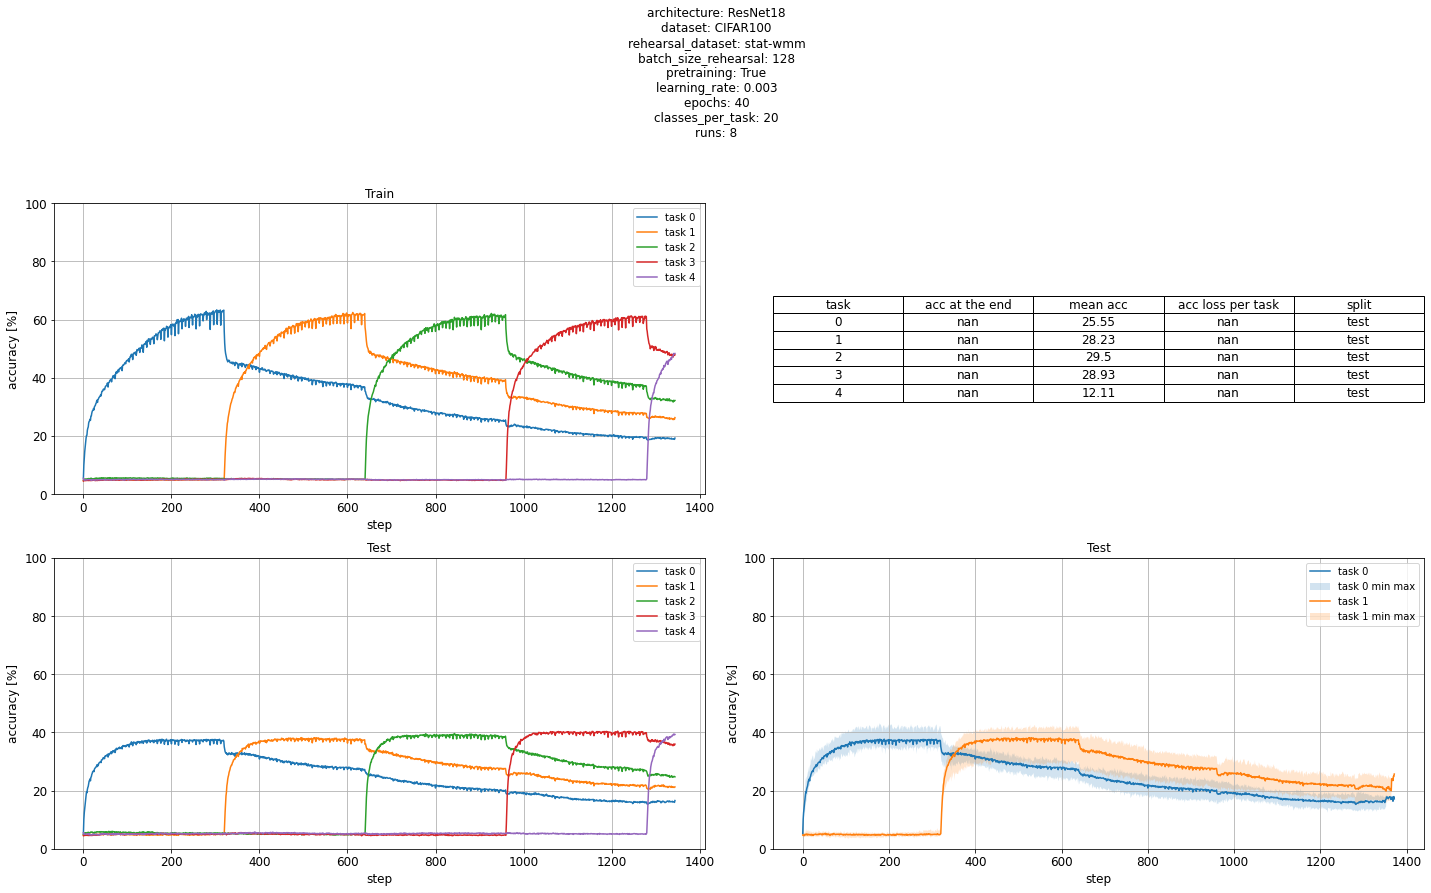

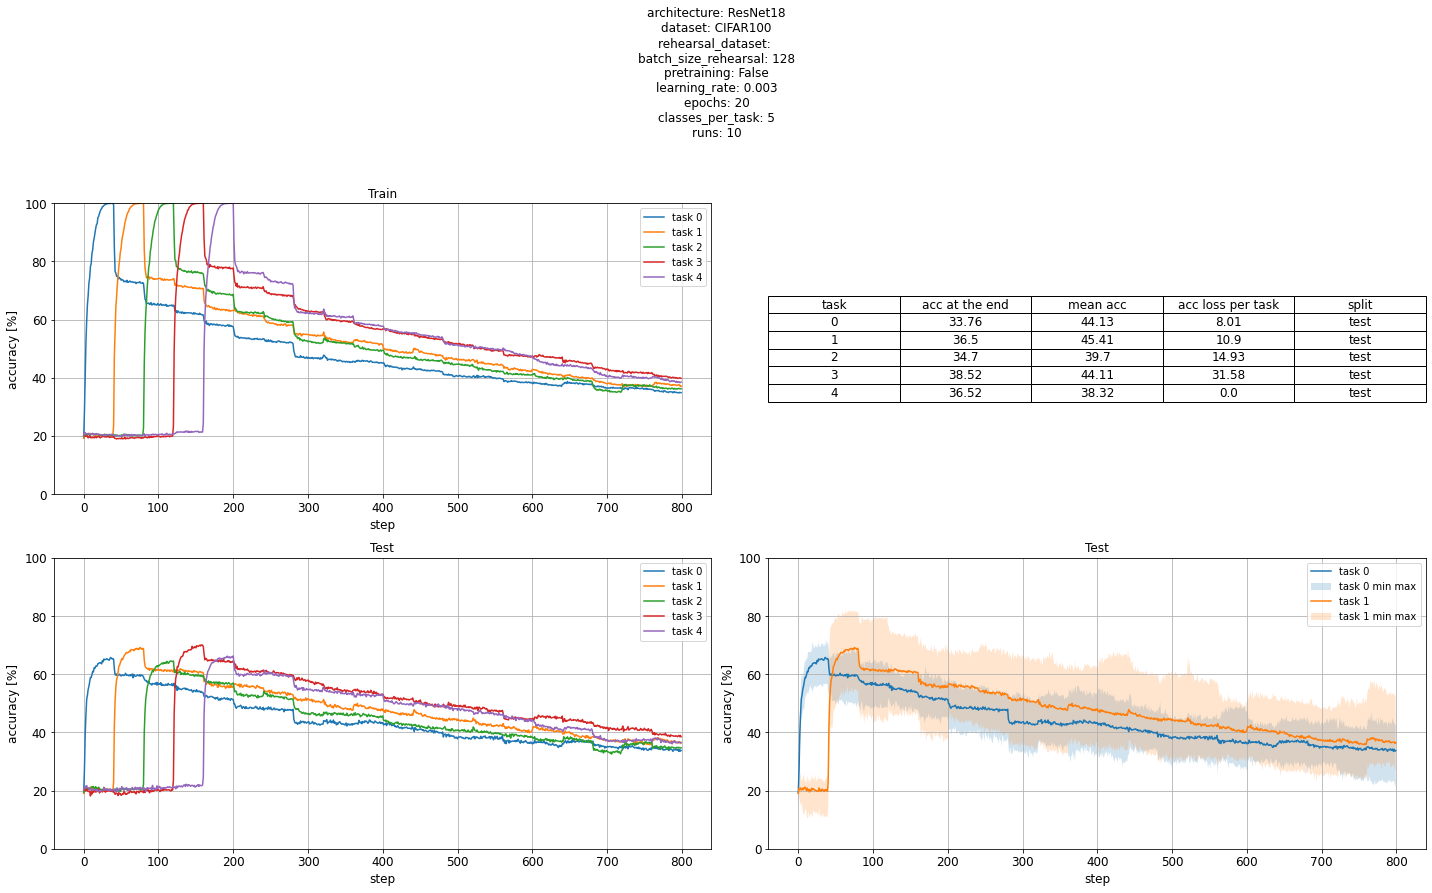

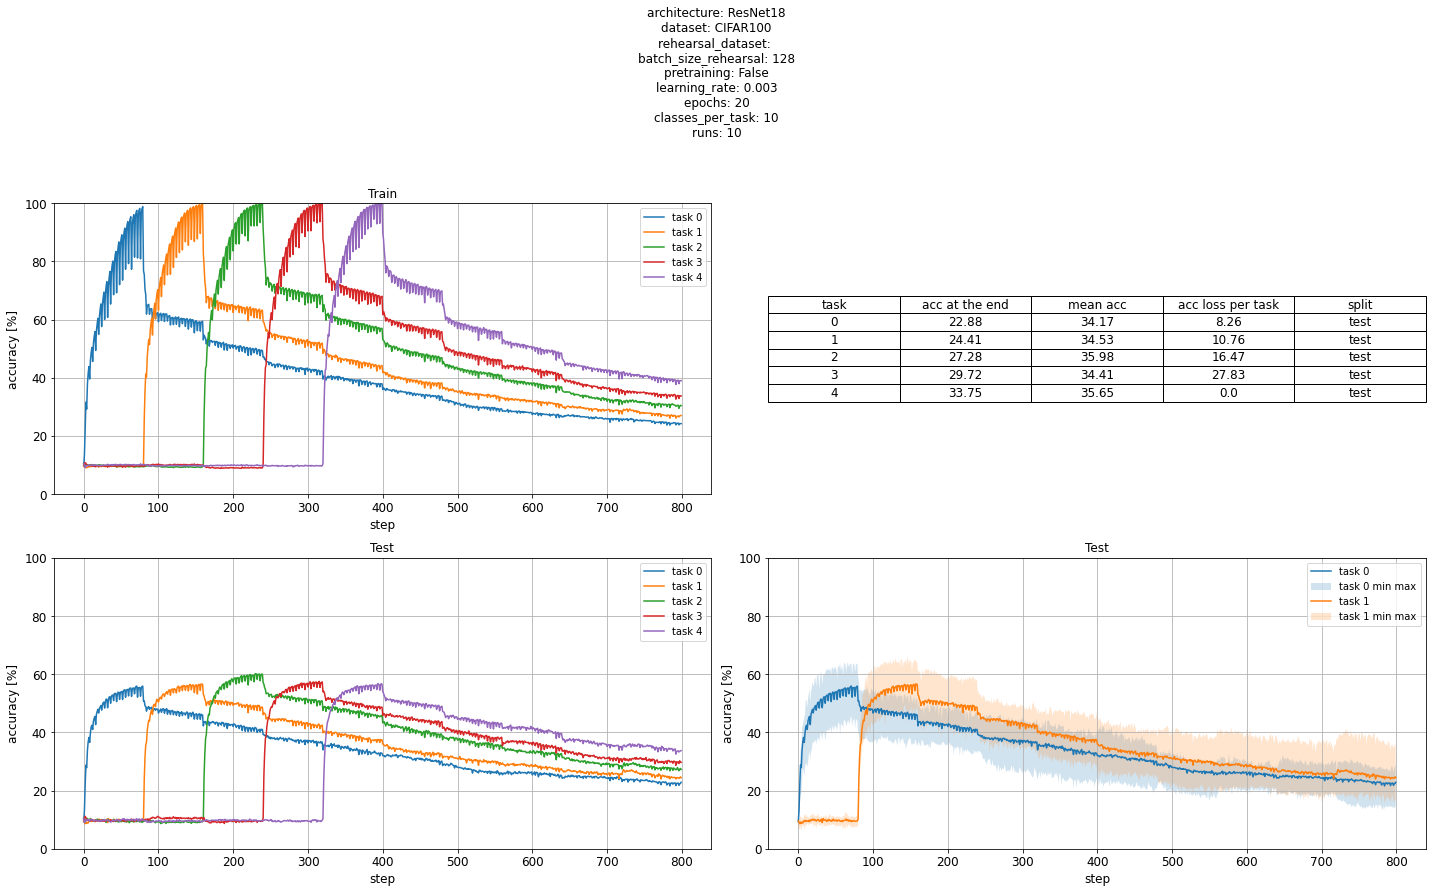

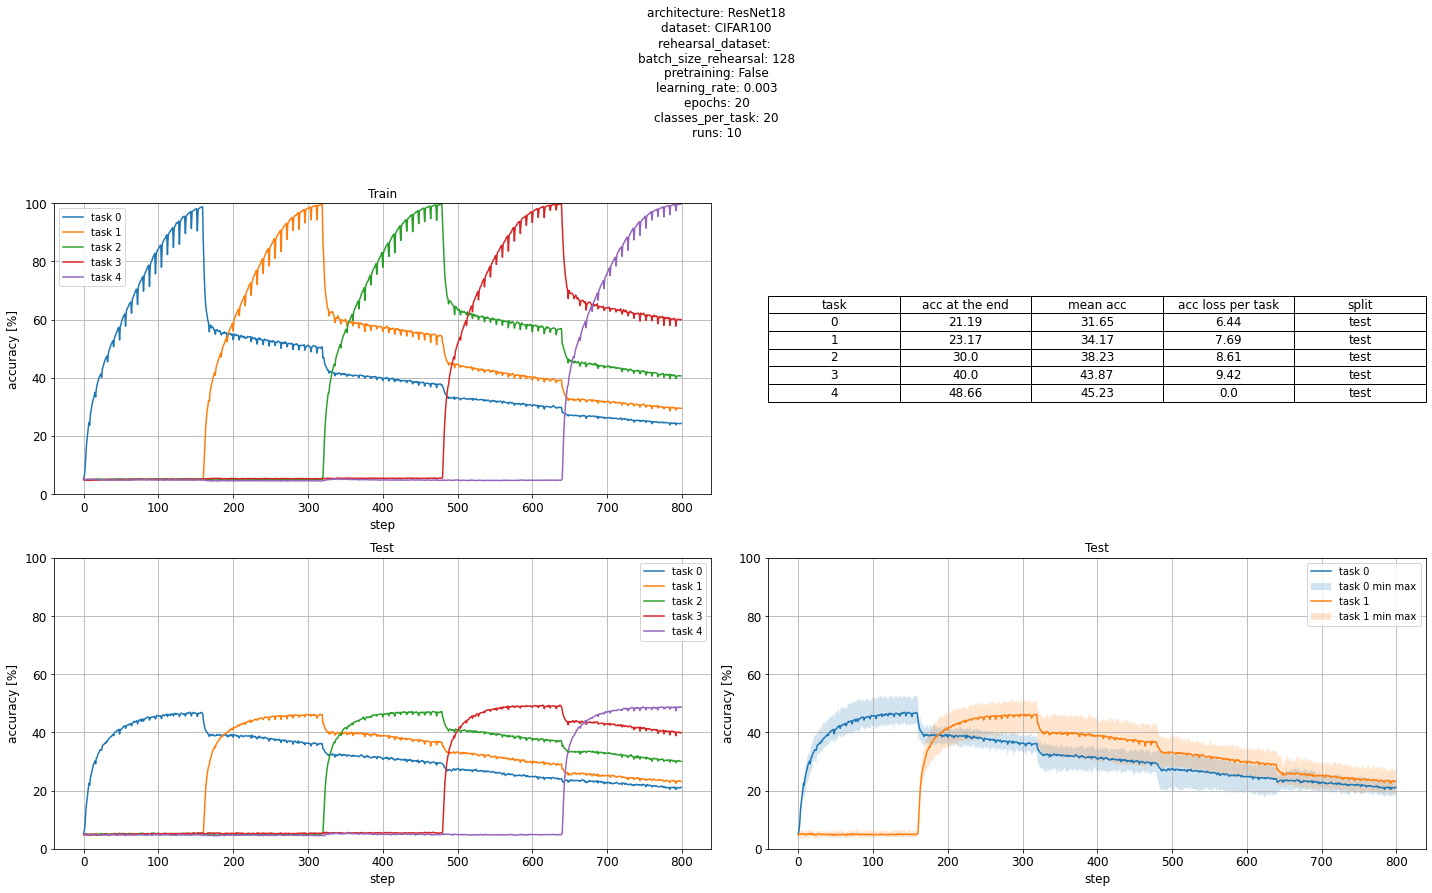

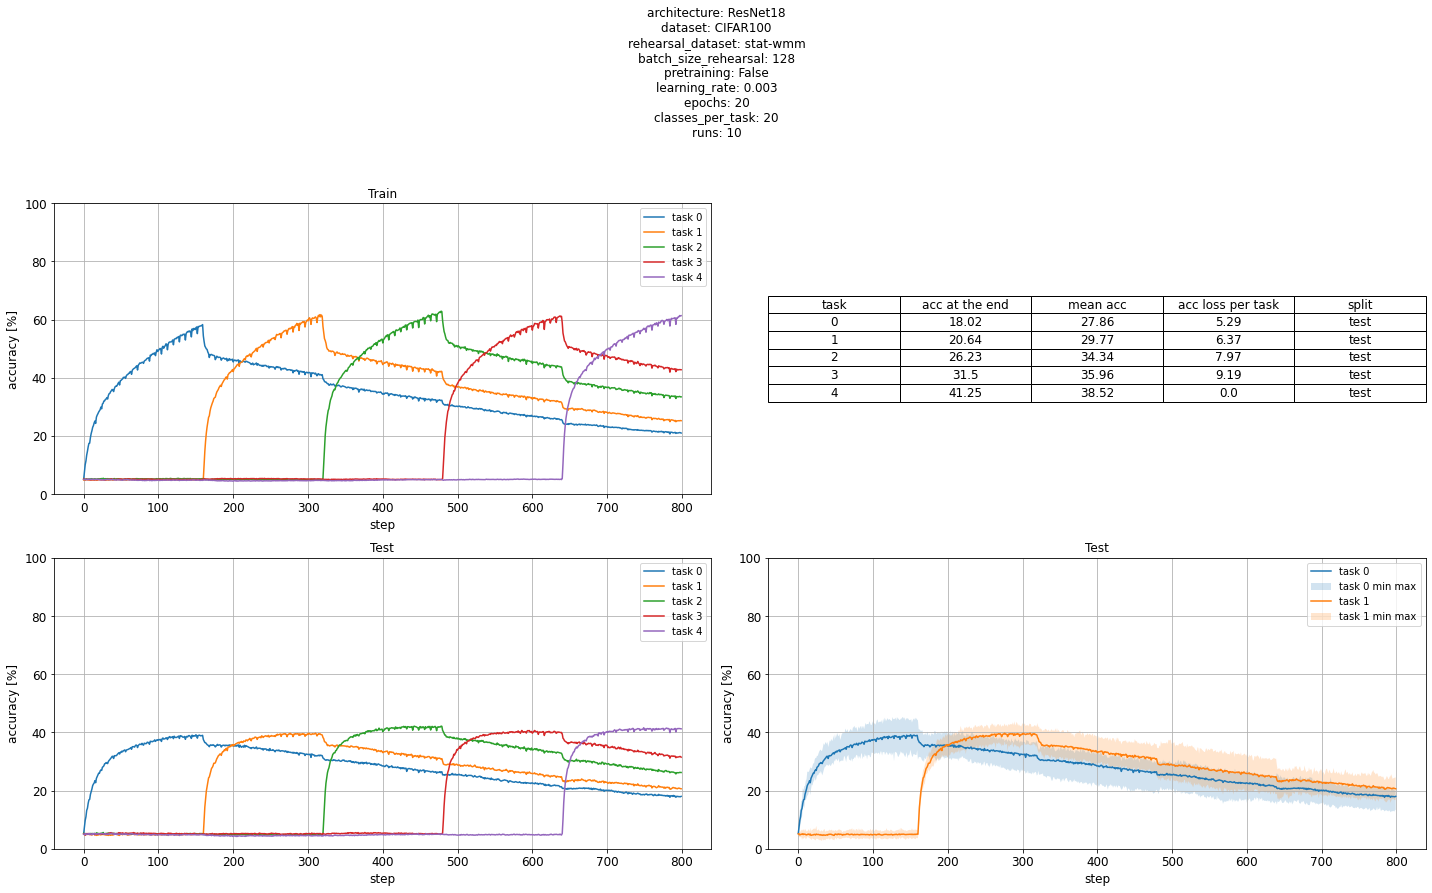

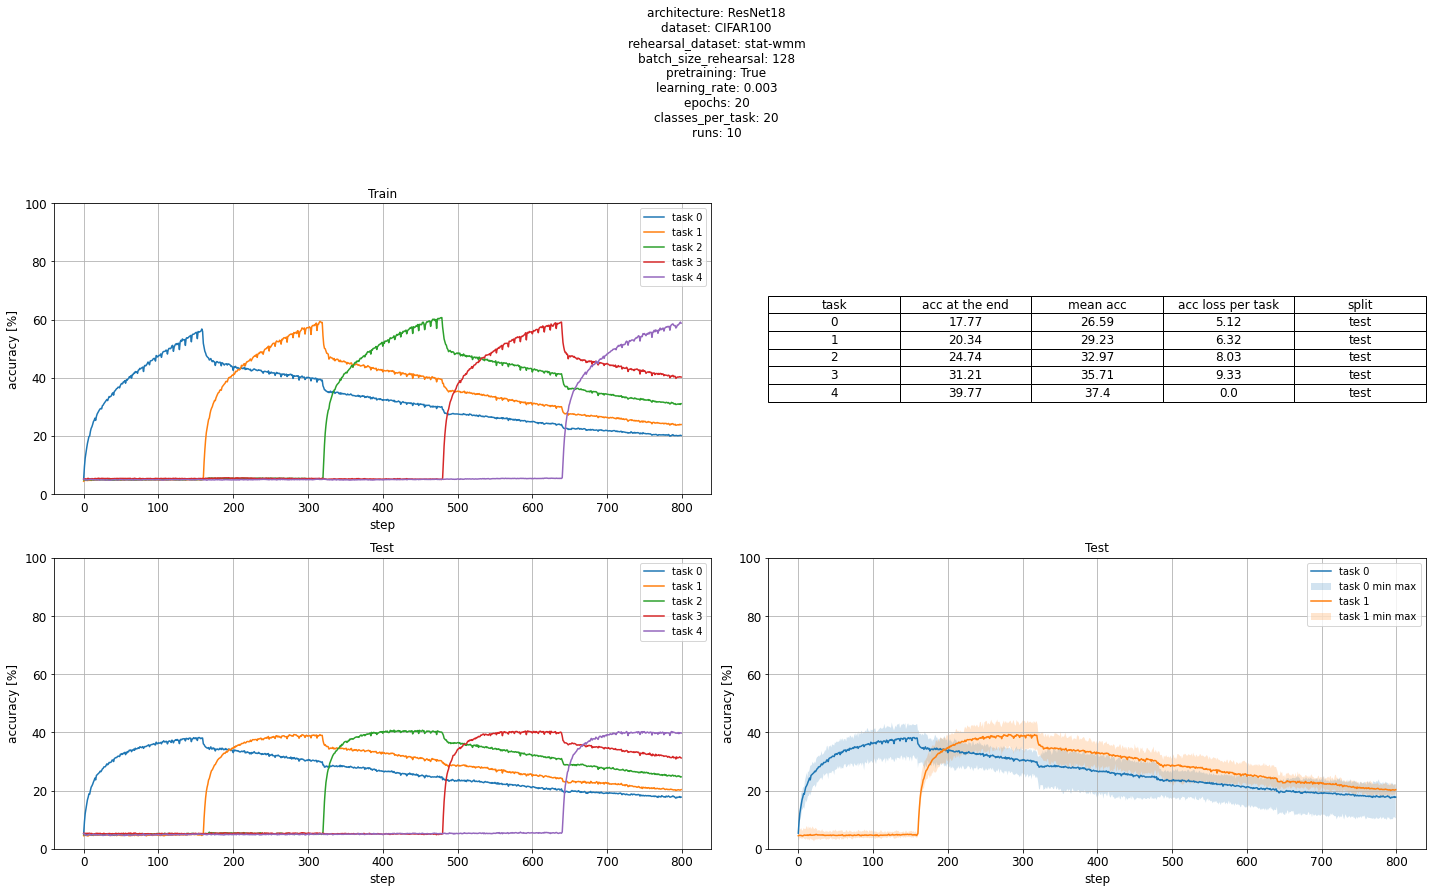

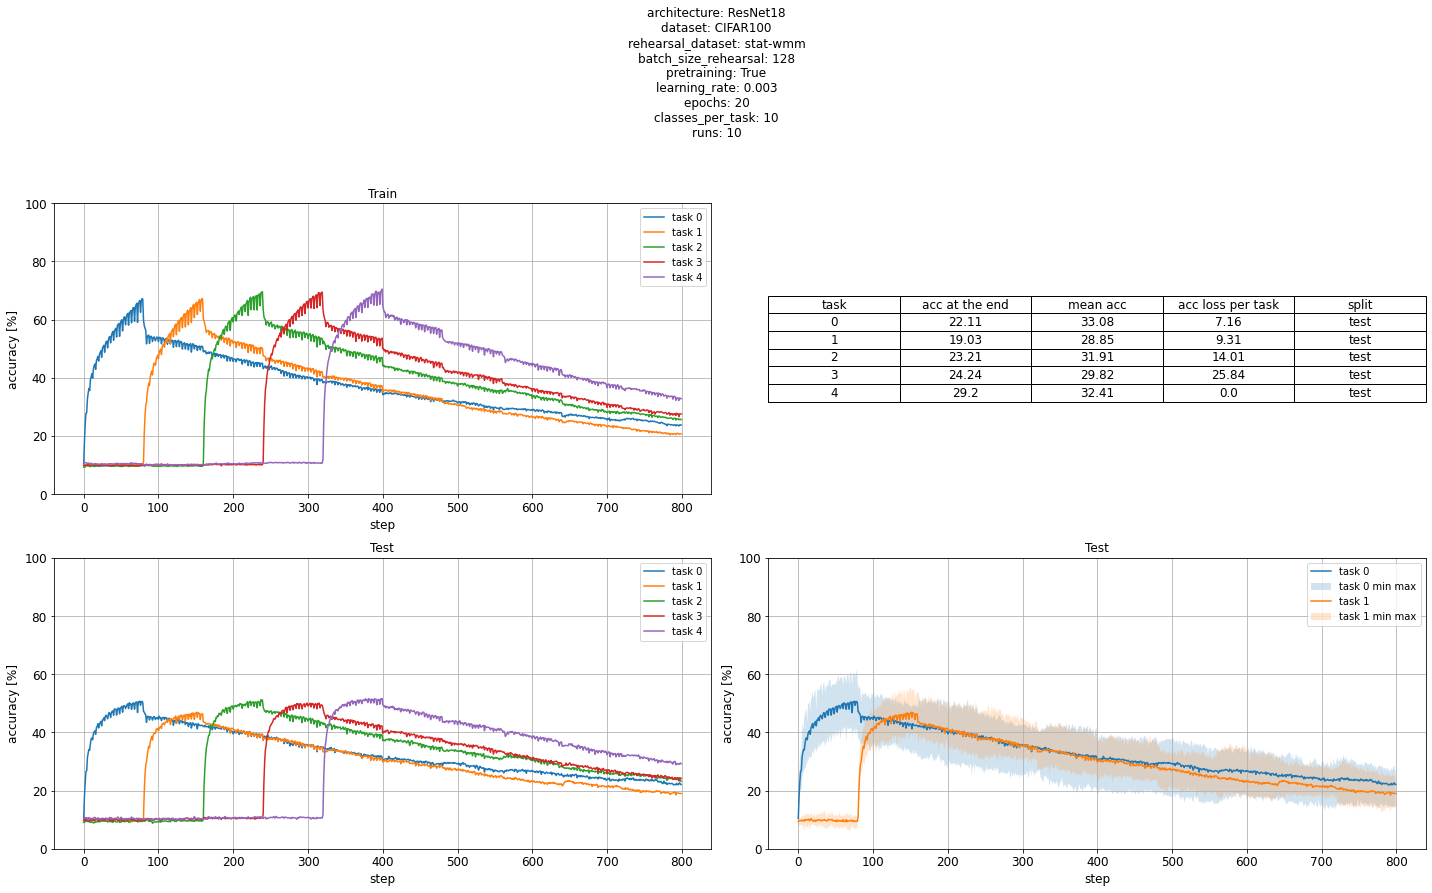

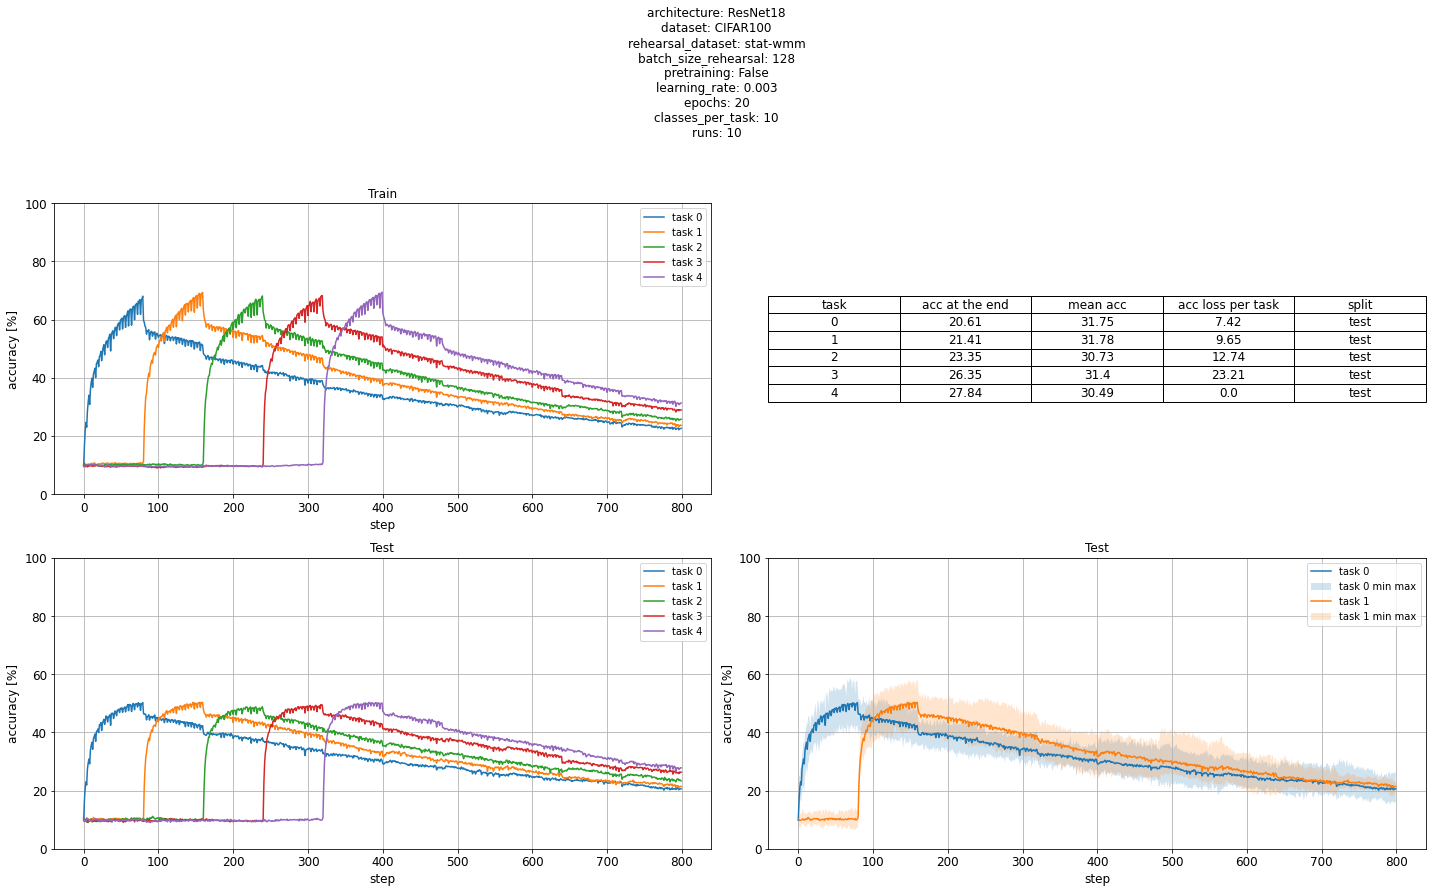

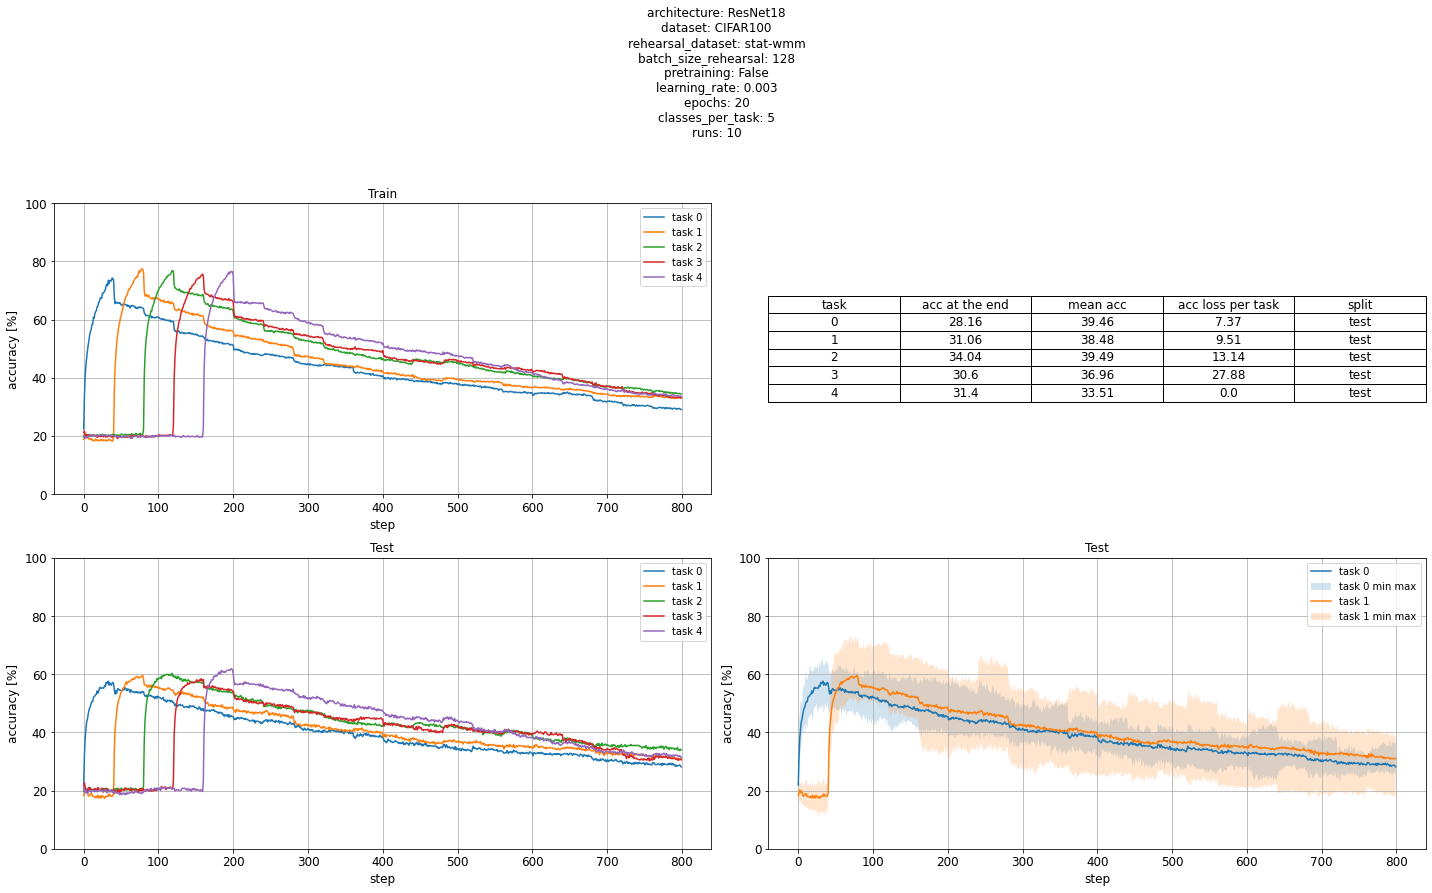

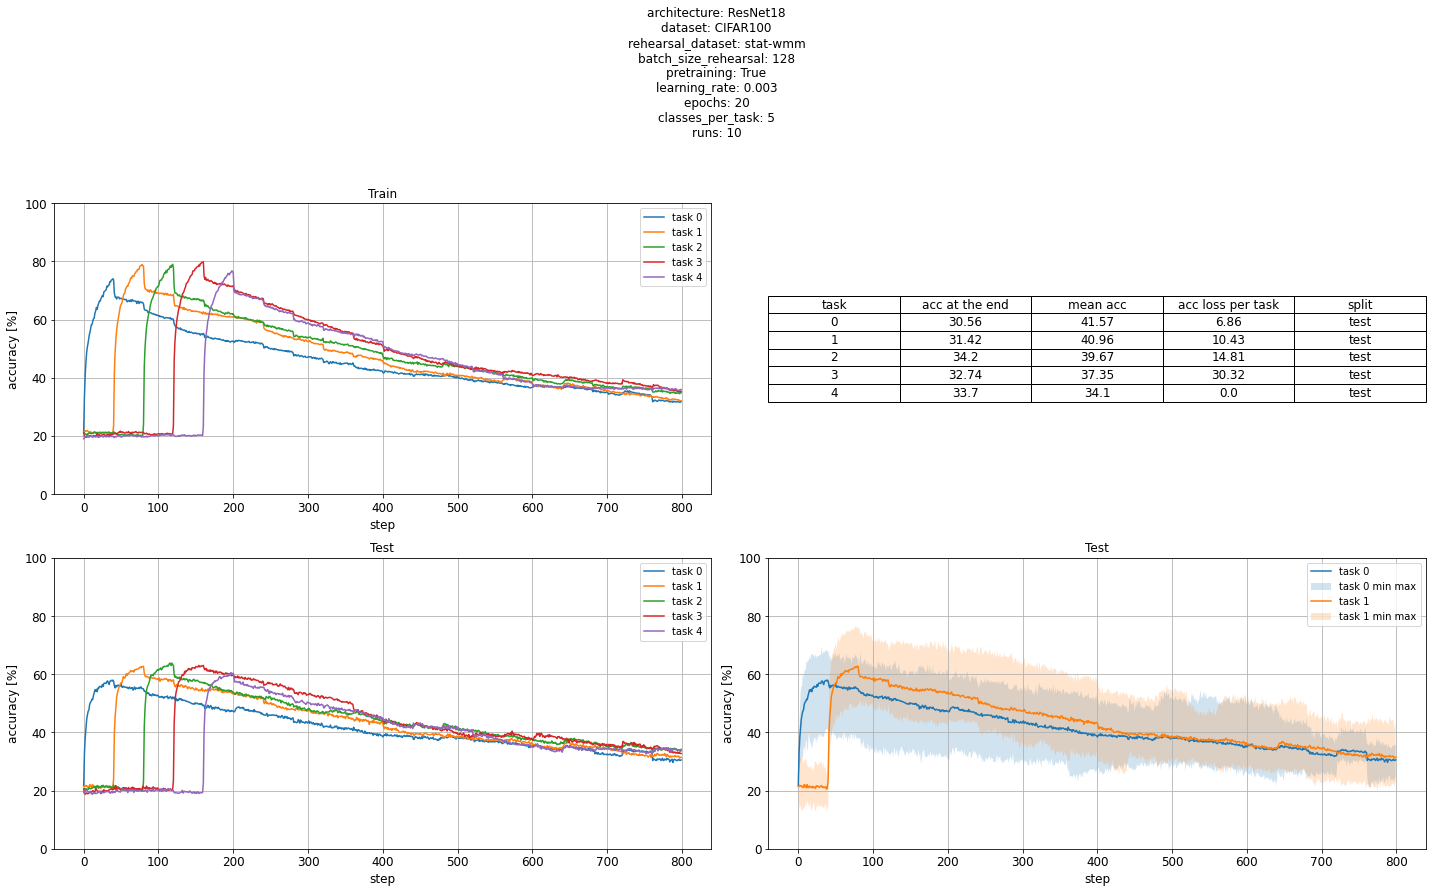

In [7]:
viz.plot_everything()